# Deep Learning Model
## Luis Arturo
### A01703572

# Conexi√≥n a GPU local

In [ ]:
import torch
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import re
import torch.nn as nn
import torch.optim as optim
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Test a simple GPU operation if available
if device.type == "cuda":
    try:
        # Create some random data on the GPU
        a = torch.randn(1000, 1000, device=device)
        b = torch.randn(1000, 1000, device=device)
        c = torch.matmul(a, b)  # Perform matrix multiplication
        print("‚úÖ Successfully performed computation on GPU!")
        print(f"Matrix multiplication result shape: {c.shape}")
    except Exception as e:
        print("‚ùå Error during GPU computation:", e)
else:
    print("CUDA is not available. Running on CPU.")

Using device: cuda
‚úÖ Successfully performed computation on GPU!
Matrix multiplication result shape: torch.Size([1000, 1000])


# ETL

## Carga de datos

In [3]:
# Configuraci√≥n para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [4]:
# 1. EXTRACT - Carga de datos
print("=== CARGANDO DATASETS ===")
games_df = pd.read_csv('data/games.csv')
users_df = pd.read_csv('data/users.csv')
recommendations_df = pd.read_csv('data/recommendations.csv')

print("=== DATASETS CARGADOS ===")

=== CARGANDO DATASETS ===
=== DATASETS CARGADOS ===


## Informaci√≥n general del dataset

In [5]:
print("\nDimensiones del games_df:", games_df.shape)
print("\nColumnas disponibles del games_df:")
for col in games_df.columns:
    print(f"- {col}")


Dimensiones del games_df: (50872, 13)

Columnas disponibles del games_df:
- app_id
- title
- date_release
- win
- mac
- linux
- rating
- positive_ratio
- user_reviews
- price_final
- price_original
- discount
- steam_deck


In [6]:
print("\nDimensiones del users_df:", users_df.shape)
print("\nColumnas disponibles del users_df:")
for col in users_df.columns:
    print(f"- {col}")


Dimensiones del users_df: (14306064, 3)

Columnas disponibles del users_df:
- user_id
- products
- reviews


In [7]:
print("\nDimensiones del recommendations_df:", recommendations_df.shape)
print("\nColumnas disponibles del recommendations_df:")
for col in recommendations_df.columns:
    print(f"- {col}")


Dimensiones del recommendations_df: (41154794, 8)

Columnas disponibles del recommendations_df:
- app_id
- helpful
- funny
- date
- is_recommended
- hours
- user_id
- review_id


### An√°lisis inicial de games

In [8]:
print("\nPrimeras 5 filas de games_df:")
print(games_df.head())
print("\nInformaci√≥n del dataset de juegos:")
print(games_df.info())
print("\nEstad√≠sticas descriptivas de games_df:")
print(games_df.describe())
print("\nValores nulos en games_df:")
print(games_df.isnull().sum())


Primeras 5 filas de games_df:
   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within‚Ñ¢   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS‚Ñ¢   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   

### An√°lisis inicial de users

In [9]:
print("\nPrimeras 5 filas de users_df:")
print(users_df.head())
print("\nInformaci√≥n del dataset de usuarios:")
print(users_df.info())
print("\nEstad√≠sticas descriptivas de users_df:")
print(users_df.describe())
print("\nValores nulos en users_df:")
print(users_df.isnull().sum())


Primeras 5 filas de users_df:
    user_id  products  reviews
0   7360263       359        0
1  14020781       156        1
2   8762579       329        4
3   4820647       176        4
4   5167327        98        2

Informaci√≥n del dataset de usuarios:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14306064 entries, 0 to 14306063
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   products  int64
 2   reviews   int64
dtypes: int64(3)
memory usage: 327.4 MB
None

Estad√≠sticas descriptivas de users_df:
            user_id      products       reviews
count  1.430606e+07  1.430606e+07  1.430606e+07
mean   7.153032e+06  1.163734e+02  2.876738e+00
std    4.129805e+06  2.438515e+02  7.987421e+00
min    0.000000e+00  0.000000e+00  0.000000e+00
25%    3.576516e+06  2.300000e+01  1.000000e+00
50%    7.153032e+06  5.500000e+01  1.000000e+00
75%    1.072955e+07  1.270000e+02  3.000000e+00
max    1.430606e+07  3.221400e+04  6.045000e+03

Valore

### An√°lisis inicial de recommendations

In [10]:
print("\nPrimeras 5 filas de recommendations_df:")
print(recommendations_df.head())
print("\nInformaci√≥n del dataset de recomendaciones:")
print(recommendations_df.info())
print("\nEstad√≠sticas descriptivas de recommendations_df:")
print(recommendations_df.describe())
print("\nValores nulos en recommendations_df:")
print(recommendations_df.isnull().sum())


Primeras 5 filas de recommendations_df:
    app_id  helpful  funny        date  is_recommended  hours  user_id  \
0   975370        0      0  2022-12-12            True   36.3    51580   
1   304390        4      0  2017-02-17           False   11.5     2586   
2  1085660        2      0  2019-11-17            True  336.5   253880   
3   703080        0      0  2022-09-23            True   27.4   259432   
4   526870        0      0  2021-01-10            True    7.9    23869   

   review_id  
0          0  
1          1  
2          2  
3          3  
4          4  

Informaci√≥n del dataset de recomendaciones:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41154794 entries, 0 to 41154793
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int64  
 1   helpful         int64  
 2   funny           int64  
 3   date            object 
 4   is_recommended  bool   
 5   hours           float64
 6   user_id         int64  
 7 

### An√°lisis expec√≠fico de features importantes

In [11]:
# An√°lisis de ratings
print("\nDistribuci√≥n de ratings en juegos:")
print(games_df['rating'].value_counts())


Distribuci√≥n de ratings en juegos:
rating
Positive                   13502
Very Positive              13139
Mixed                      12157
Mostly Positive             8738
Mostly Negative             1849
Overwhelmingly Positive     1110
Negative                     303
Very Negative                 60
Overwhelmingly Negative       14
Name: count, dtype: int64


/tmp/ipykernel_8016/1661441128.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=ratings_df,


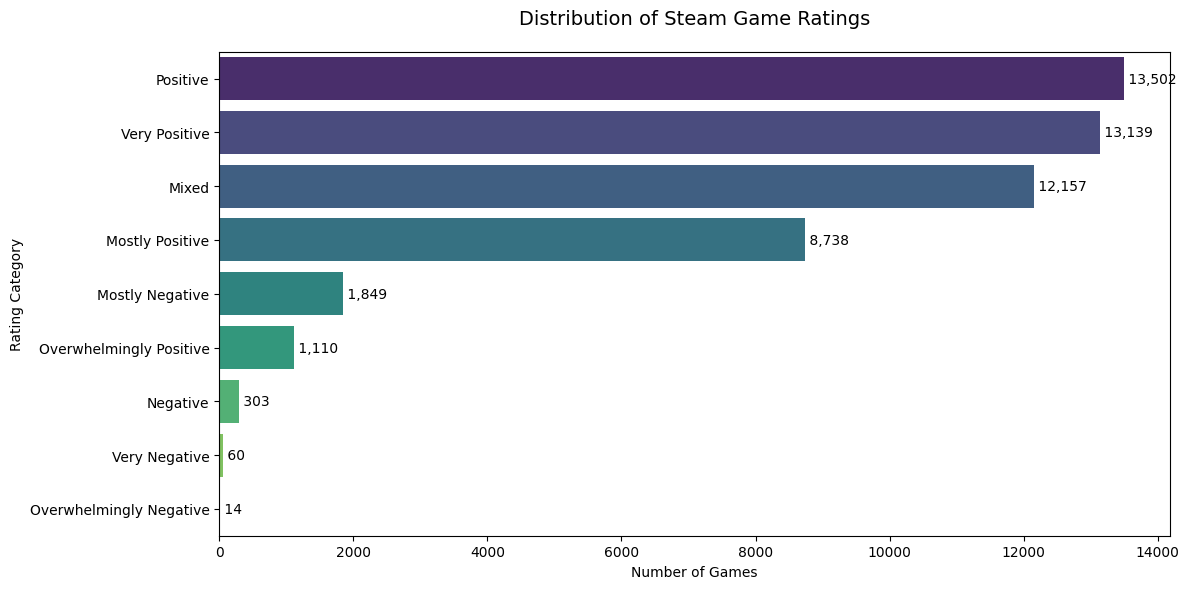

In [12]:
# Create value counts series and reset index to convert to DataFrame
ratings_df = games_df['rating'].value_counts().reset_index()
ratings_df.columns = ['Rating', 'Count']

plt.figure(figsize=(12, 6))
sns.barplot(data=ratings_df, 
           x='Count', 
           y='Rating',
           palette='viridis')

plt.title('Distribution of Steam Game Ratings', pad=20, size=14)
plt.xlabel('Number of Games')
plt.ylabel('Rating Category')

# Add value labels
for i, v in enumerate(ratings_df['Count']):
    plt.text(v, i, f' {v:,}', va='center')

plt.tight_layout()
plt.show()

In [13]:
# An√°lisis de precios
print("\nEstad√≠sticas de precios:")
print(games_df[['price_final', 'price_original']].describe())


Estad√≠sticas de precios:
        price_final  price_original
count  50872.000000    50872.000000
mean       8.620325        8.726788
std       11.514164       11.507021
min        0.000000        0.000000
25%        0.990000        0.990000
50%        4.990000        4.990000
75%       10.990000       11.990000
max      299.990000      299.990000


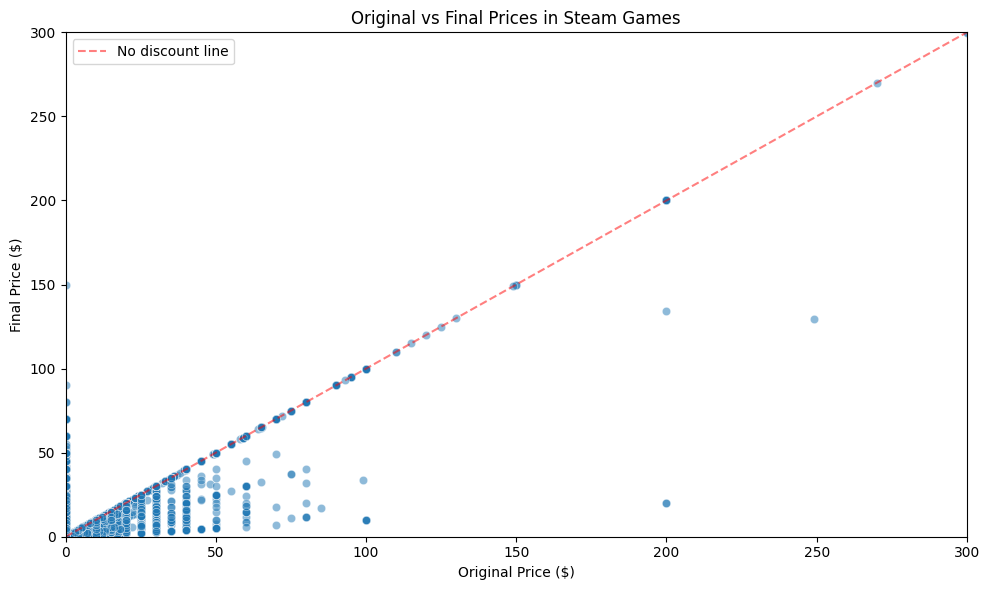

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=games_df, 
                x='price_original', 
                y='price_final',
                alpha=0.5)

# Add diagonal line representing equal prices
max_price = max(games_df['price_original'].max(), games_df['price_final'].max())
plt.plot([0, max_price], [0, max_price], 'r--', alpha=0.5, label='No discount line')

plt.title('Original vs Final Prices in Steam Games')
plt.xlabel('Original Price ($)')
plt.ylabel('Final Price ($)')
plt.legend()

# Limit axes to focus on main price range (excluding outliers)
plt.xlim(0, 300)
plt.ylim(0, 300)

plt.tight_layout()
plt.show()

In [15]:
# An√°lisis de recomendaciones
print("\nDistribuci√≥n de recomendaciones:")
print(recommendations_df['is_recommended'].value_counts(normalize=True))


Distribuci√≥n de recomendaciones:
is_recommended
True     0.857844
False    0.142156
Name: proportion, dtype: float64


In [16]:
# An√°lisis de horas jugadas
print("\nEstad√≠sticas de horas jugadas:")
print(recommendations_df['hours'].describe())


Estad√≠sticas de horas jugadas:
count    4.115479e+07
mean     1.006022e+02
std      1.761675e+02
min      0.000000e+00
25%      7.800000e+00
50%      2.730000e+01
75%      9.920000e+01
max      1.000000e+03
Name: hours, dtype: float64


### Verificamos la integridad de referencias entre los datasets
Nos aseguramos de que los juegos y los usuarios referenciados en rese√±as existen en el dataset de juegos y en el de usuarios

In [17]:
# Verificar si todos los app_id en recommendations existen en games
games_apps = set(games_df['app_id'])
recommendations_apps = set(recommendations_df['app_id'])
print("\nJuegos en recommendations pero no en games:", len(recommendations_apps - games_apps))


Juegos en recommendations pero no en games: 0


In [18]:
# Verificar si todos los user_id en recommendations existen en users
users_ids = set(users_df['user_id'])
recommendations_users = set(recommendations_df['user_id'])
print("Usuarios en recommendations pero no en users:", len(recommendations_users - users_ids))

Usuarios en recommendations pero no en users: 0


## Se va a crear un modelo capaz de predecir el rating que tendr√° un juego ("Very Positive", "Mixed", etc.) 
## Son 9 clases 
- Positive                   13502
- Very Positive              13139
- Mixed                      12157
- Mostly Positive             8738
- Mostly Negative             1849
- Overwhelmingly Positive     1110
- Negative                     303
- Very Negative                 60
- Overwhelmingly Negative       14

## Features de entrada
- T√≠tulo del juego
- Precio
- Plataformas soportadas (win, mac, linux)
- Tiempo en el mercado
- M√©tricas agregadas de reviews (horas promedio jugadas, cantidad de reviews √∫tiles)

## Preprocesamiendo de los datos

### Creamos features en base a las recomendaciones de los juegos

In [19]:
game_metrics = recommendations_df.groupby('app_id').agg({
    'hours': ['mean', 'median', 'std'],
    'is_recommended': 'mean',
    'helpful': 'mean',
    'funny': 'mean'
}).reset_index()

# Aplanar los nombres de las columnas
game_metrics.columns = ['app_id', 'avg_hours', 'median_hours', 'std_hours', 
                        'recommendation_ratio', 'avg_helpful', 'avg_funny']

### Procesamos las fechas para calcular el tiempo que el juego ha estado en el mercado

In [20]:
games_df['date_release'] = pd.to_datetime(games_df['date_release'])
reference_date = pd.to_datetime('2024-11-01')  # Fecha de referencia
games_df['days_in_market'] = (reference_date - games_df['date_release']).dt.days

### Unimos los nuevos features en un dataset final usando como base el de games

In [21]:
final_df = games_df.merge(game_metrics, on='app_id', how='left')
    
# 4. Rellenar valores nulos
final_df = final_df.fillna({
    'avg_hours': 0,
    'median_hours': 0,
    'std_hours': 0,
    'recommendation_ratio': 0.5,
    'avg_helpful': 0,
    'avg_funny': 0
})

In [22]:
final_df.head()

app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within‚Ñ¢   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS‚Ñ¢   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_deck  days_in_market  avg_hours  median_hours  std_hours  \
0       0.0        True            5824  18.967912          12.9  41.722269   
1       0.0        True            4839   0.000000           0.0   0.000000   
2       0.0        True            4209  20.413294           6.9  53.295053   
3       0.0        True            3636  10.776625           8.1  15.421851   
4       0.0        True            3658  40.621691          23.4  54.860085   

   recommendation_ratio  avg_helpful  avg_funny  
0              0.845789     5.392052   0.612100  
1              0.500000     0.000000   0.000000  
2              0.908541     1.434682   0.450382  
3              0.625998     6.778791   0.815279  
4              0.885567     2.530928   0.698351

In [23]:
final_df.describe()

app_id                   date_release  positive_ratio  \
count  5.087200e+04                          50872    50872.000000   
mean   1.055224e+06  2019-03-13 03:53:57.112753664       77.052033   
min    1.000000e+01            1997-06-30 00:00:00        0.000000   
25%    5.287375e+05            2017-03-21 00:00:00       67.000000   
50%    9.860850e+05            2019-08-23 00:00:00       81.000000   
75%    1.524895e+06            2021-09-21 00:00:00       91.000000   
max    2.599300e+06            2023-10-24 00:00:00      100.000000   
std    6.103249e+05                            NaN       18.253592   

       user_reviews   price_final  price_original      discount  \
count  5.087200e+04  50872.000000    50872.000000  50872.000000   
mean   1.824425e+03      8.620325        8.726788      5.592212   
min    1.000000e+01      0.000000        0.000000      0.000000   
25%    1.900000e+01      0.990000        0.990000      0.000000   
50%    4.900000e+01      4.990000        4.990000      0.000000   
75%    2.060000e+02     10.990000       11.990000      0.000000   
max    7.494460e+06    299.990000      299.990000     90.000000   
std    4.007352e+04     11.514164       11.507021     18.606679   

       days_in_market     avg_hours  median_hours     std_hours  \
count    50872.000000  50872.000000  50872.000000  50872.000000   
mean      2059.837533     12.017546      5.630656     21.209406   
min        374.000000      0.000000      0.000000      0.000000   
25%       1137.000000      0.000000      0.000000      0.000000   
50%       1897.000000      3.436826      1.500000      4.186043   
75%       2782.000000     10.730804      5.000000     21.601544   
max       9986.000000    487.000000    511.500000    495.120177   
std       1125.133076     28.005183     16.127001     41.136308   

       recommendation_ratio   avg_helpful     avg_funny  
count          50872.000000  50872.000000  50872.000000  
mean               0.697721      2.927259      0.496619  
min                0.000000      0.000000      0.000000  
25%                0.500000      0.000000      0.000000  
50%                0.714286      2.178243      0.131972  
75%                0.881546      4.000000      0.482362  
max                1.000000    268.285714    266.285714  
std                0.204218      4.689921      2.481174

In [24]:
final_df.max()

app_id                              2599300
title                      üß† OUT OF THE BOX
date_release            2023-10-24 00:00:00
win                                    True
mac                                    True
linux                                  True
rating                        Very Positive
positive_ratio                          100
user_reviews                        7494460
price_final                          299.99
price_original                       299.99
discount                               90.0
steam_deck                             True
days_in_market                         9986
avg_hours                             487.0
median_hours                          511.5
std_hours                        495.120177
recommendation_ratio                    1.0
avg_helpful                      268.285714
avg_funny                        266.285714
dtype: object

### Se encontr√≥ un juego que posee m√©tricas exageradas, al compararlo con Steam nos dimos cuenta de que parece ser un error
En base a esto imprimimos todos los juegos que tienen un precion final mayor a 70

In [25]:
juegos_filtrados = final_df[final_df['price_final'] > 70]

In [26]:
juegos_filtrados

app_id                                              title  \
81      438450                      3DF Zephyr Lite Steam Edition   
144     537770         Gal*Gun: Double Peace - 'Pheromone Z' Item   
190     554820                              VideoPad Video Editor   
403    1076160                         Command: Modern Operations   
675    1182920  Movavi Video Editor Plus 2020 - Video Editing ...   
...        ...                                                ...   
47765   411893                                DCS: F-14A/B Tomcat   
48354  1096900                                       RPG Maker MZ   
49167  2199970                          Substance 3D Painter 2023   
49310  2070990                        VEGAS Edit 20 Steam Edition   
49880   931980                       Dreadnought Outlaw Hoard DLC   

      date_release   win    mac  linux         rating  positive_ratio  \
81      2016-02-02  True  False  False  Very Positive              96   
144     2016-10-20  True  False  False       Positive              91   
190     2016-12-01  True   True  False  Very Positive              80   
403     2019-11-14  True  False  False  Very Positive              84   
675     2019-11-25  True   True  False  Very Positive              80   
...            ...   ...    ...    ...            ...             ...   
47765   2019-03-13  True  False  False  Very Positive              92   
48354   2020-08-27  True   True  False  Very Positive              83   
49167   2023-01-23  True   True   True  Very Positive              85   
49310   2022-11-01  True  False  False          Mixed              66   
49880   2018-10-14  True  False  False       Positive              87   

       user_reviews  price_final  price_original  discount  steam_deck  \
81               58       199.99          199.99       0.0        True   
144              12        89.99           89.99       0.0        True   
190              51        99.99           99.99       0.0        True   
403             897        79.99           79.99       0.0        True   
675             874        74.99           74.99       0.0        True   
...             ...          ...             ...       ...         ...   
47765           555        79.99           79.99       0.0        True   
48354          1070        80.00            0.00       0.0        True   
49167           148       150.00            0.00       0.0        True   
49310            21       129.48          249.00      48.0        True   
49880            16        79.99           79.99       0.0        True   

       days_in_market   avg_hours  median_hours   std_hours  \
81               3195  243.356250        121.35  265.982864   
144              2934    0.000000          0.00    0.000000   
190              2892  221.103030        130.70  238.796225   
403              1814  126.815050         49.00  186.176124   
675              1803  111.442762         56.80  161.577714   
...               ...         ...           ...         ...   
47765            2060    0.000000          0.00    0.000000   
48354            1527  186.038028         72.85  249.288267   
49167             648    0.000000          0.00    0.000000   
49310             731   68.566667          5.60  113.331475   
49880            2210    0.000000          0.00    0.000000   

       recommendation_ratio  avg_helpful  avg_funny  
81                 1.000000     4.979167   0.750000  
144                0.500000     0.000000   0.000000  
190                0.787879     3.212121   0.242424  
403                0.859532    12.749164   5.050167  
675                0.788419     1.817372   0.227171  
...                     ...          ...        ...  
47765              0.500000     0.000000   0.000000  
48354              0.791080    16.969484   3.521127  
49167              0.500000     0.000000   0.000000  
49310              0.666667    19.333333   5.333333  
49880              0.500000     0.000000   0.000000  

[150 ro

Al ser solo 150 juegos, decidimos tirarlos para evitar conflictor

In [27]:
final_df = final_df[final_df['price_final'] <= 70].reset_index(drop=True)


In [28]:
final_df = final_df[final_df['price_original'] <= 70].reset_index(drop=True)


In [29]:
final_df.max()

app_id                              2599300
title                      üß† OUT OF THE BOX
date_release            2023-10-24 00:00:00
win                                    True
mac                                    True
linux                                  True
rating                        Very Positive
positive_ratio                          100
user_reviews                        7494460
price_final                            70.0
price_original                        69.99
discount                               90.0
steam_deck                             True
days_in_market                         9986
avg_hours                             487.0
median_hours                          511.5
std_hours                        495.120177
recommendation_ratio                    1.0
avg_helpful                      268.285714
avg_funny                        266.285714
dtype: object

### Parece ser que hay juegos con nombres repetidos, eliminamos aquellos que esten repetidos ya que solo son 121 t√≠tulos problem√°ticos

In [30]:
titulos_duplicados = final_df['title'].duplicated().sum()
print(f"N√∫mero de t√≠tulos duplicados: {titulos_duplicados}")
titulos_repetidos = final_df[final_df['title'].duplicated(keep=False)]['title'].unique()
print(f"T√≠tulos duplicados: {titulos_repetidos}")

N√∫mero de t√≠tulos duplicados: 121
T√≠tulos duplicados: ['Prison Wars' 'The Good Life' 'RUSH' 'Hide and Seek' 'Remnants'
 'Blade of Darkness' 'The Cleaner' 'Rogue' 'Lighthouse Keeper' 'Valor'
 'Last Stop' 'fishy' 'Flashback' 'The Hotel' '3D Organon Anatomy'
 'Minotaur' 'Northern Lights' 'First Snow' 'Momentum' 'Alter Ego'
 'The Backrooms' 'Locked Up' 'Get Stuffed!' 'Ascent' 'The Hunt' 'Hatch'
 'Lost' 'Warhammer Quest' 'Apollo 11 VR' 'Psych' 'Eternal Return'
 'Achievement Clicker' 'Call of Duty¬Æ' 'Causality' 'The Lost Village'
 'Resonance' 'Dead Forest' 'Lost Marbles' 'Wanderer' 'Castles' 'Grapple'
 'Chaos Theory' 'Dungeon Warriors' 'Bounce' 'Evolution' 'Zombie Survivors'
 'Ritual' 'Archery Simulator' 'Outpost' 'Shutter' 'The Line' 'The Village'
 'The Wanderer' 'Fantasy Gladiators' 'Cave Crawler' 'Cursed'
 'A Walk in the Woods' 'Dark Matter' 'Beyond the Wall' 'White Mirror'
 'Zombie Apocalypse' 'RIFT' 'STAY' 'Silent World' 'REALITY' 'Tomorrow'
 'Arachnophobia' 'Vaccine' 'Arena' 'Dog A

In [31]:
titulos_unicos = ~final_df['title'].duplicated(keep=False)

# Filtrar el DataFrame para conservar solo los t√≠tulos √∫nicos
final_df = final_df[titulos_unicos].reset_index(drop=True)
final_df.describe()

app_id                   date_release  positive_ratio  \
count  5.047200e+04                          50472    50472.000000   
mean   1.053253e+06  2019-03-10 18:46:25.164051456       77.107149   
min    1.000000e+01            1997-06-30 00:00:00        0.000000   
25%    5.279475e+05            2017-03-17 00:00:00       67.000000   
50%    9.840950e+05            2019-08-20 00:00:00       81.000000   
75%    1.521705e+06            2021-09-17 00:00:00       91.000000   
max    2.599300e+06            2023-10-24 00:00:00      100.000000   
std    6.095610e+05                            NaN       18.217559   

       user_reviews   price_final  price_original      discount  \
count  5.047200e+04  50472.000000    50472.000000  50472.000000   
mean   1.827487e+03      8.334297        8.418423      5.593557   
min    1.000000e+01      0.000000        0.000000      0.000000   
25%    1.900000e+01      0.990000        0.990000      0.000000   
50%    4.900000e+01      4.990000        4.990000      0.000000   
75%    2.080000e+02     10.990000       11.990000      0.000000   
max    7.494460e+06     70.000000       69.990000     90.000000   
std    4.018612e+04      9.882176        9.686554     18.599731   

       days_in_market     avg_hours  median_hours     std_hours  \
count    50472.000000  50472.000000  50472.000000  50472.000000   
mean      2062.217764     11.961956      5.609096     21.154918   
min        374.000000      0.000000      0.000000      0.000000   
25%       1141.000000      0.000000      0.000000      0.000000   
50%       1900.000000      3.460451      1.500000      4.203173   
75%       2786.000000     10.753019      5.000000     21.654140   
max       9986.000000    487.000000    511.500000    495.120177   
std       1125.329458     27.762187     16.033585     40.894435   

       recommendation_ratio   avg_helpful     avg_funny  
count          50472.000000  50472.000000  50472.000000  
mean               0.698100      2.921674      0.494605  
min                0.000000      0.000000      0.000000  
25%                0.500000      0.000000      0.000000  
50%                0.716655      2.176318      0.131313  
75%                0.881903      4.000000      0.480000  
max                1.000000    268.285714    266.285714  
std                0.204009      4.688425      2.486727

In [32]:
titulos_duplicados = final_df['title'].duplicated().sum()
print(f"N√∫mero de t√≠tulos duplicados: {titulos_duplicados}")
titulos_repetidos = final_df[final_df['title'].duplicated(keep=False)]['title'].unique()
print(f"T√≠tulos duplicados: {titulos_repetidos}")

N√∫mero de t√≠tulos duplicados: 0
T√≠tulos duplicados: []


### Definimos las features que se usar√°n para el modelo

In [33]:
features = [
    'price_final', 'price_original', 'discount',
    'win', 'mac', 'linux', 'steam_deck',
    'days_in_market',
    'avg_hours', 'median_hours', 'std_hours',
    'recommendation_ratio', 'avg_helpful', 'avg_funny'
]

### Por los valores tan diferentes que tenemos en el dataset, normalizamos los datos para que puedan ser usados por el modelo sin problemas y no haya valores extremos que hagan que los valores menores no tengan importancia

In [34]:
scaler = StandardScaler()
numeric_features = [
    'price_final', 'price_original', 'discount',
    'days_in_market', 'avg_hours', 'median_hours', 'std_hours',
    'recommendation_ratio', 'avg_helpful', 'avg_funny'
]
final_df[numeric_features] = scaler.fit_transform(final_df[numeric_features])

### Pasamos la compatibilidad con diferentes plataformas a que sean booleanas, 0 o 1

In [35]:
bool_features = ['win', 'mac', 'linux', 'steam_deck']
final_df[bool_features] = final_df[bool_features].astype(int)

### Preparamos la variable dependiente (y)

In [36]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(final_df['rating'])
y = label_encoder.fit_transform(final_df['rating'])

### Preparamos las features (x)

In [37]:
X = final_df[features].values

# Embeddings

### Limpiamos los t√≠tulos

In [38]:
import torch
from torch.nn.utils.rnn import pad_sequence

In [39]:
def clean_title(title):
    """
    Limpia y normaliza el t√≠tulo del juego.
    
    Args:
        title (str): T√≠tulo original del juego
        
    Returns:
        str: T√≠tulo limpio y normalizado
    """
    # Convertir a min√∫sculas
    title = title.lower()
    
    # Eliminar caracteres especiales y s√≠mbolos, manteniendo espacios
    title = re.sub(r'[^\w\s]', ' ', title)
    
    # Eliminar espacios m√∫ltiples
    title = ' '.join(title.split())
    
    return title

# Aplicar la limpieza a los t√≠tulos
final_df['clean_title'] = final_df['title'].apply(clean_title)

### Creamos y configuramos el tokenizer (TorchText no me funciona)

In [40]:
class SimpleTokenizer:
    def __init__(self, num_words=10000, oov_token='<OOV>'):
        self.num_words = num_words
        self.oov_token = oov_token
        self.word_index = {}
        self.index_word = {}
        self.word_counts = {}
        
    def fit_on_texts(self, texts):
        # Contar todas las palabras
        for text in texts:
            for word in text.split():
                self.word_counts[word] = self.word_counts.get(word, 0) + 1
        
        # Ordenar por frecuencia y tomar los num_words m√°s frecuentes
        sorted_words = sorted(self.word_counts.items(), 
                            key=lambda x: x[1], 
                            reverse=True)[:self.num_words-1]
        
        # Crear mappings
        self.word_index = {self.oov_token: 0}
        self.index_word = {0: self.oov_token}
        
        for idx, (word, _) in enumerate(sorted_words, 1):
            self.word_index[word] = idx
            self.index_word[idx] = word
    
    def texts_to_sequences(self, texts):
        sequences = []
        for text in texts:
            sequence = []
            for word in text.split():
                sequence.append(self.word_index.get(word, 0))  # 0 es OOV
            sequences.append(sequence)
        return sequences

### Funci√≥n para hacer padding

In [41]:
def pad_sequences(sequences, max_len=None, padding_value=0):
    """
    Hace padding de las secuencias a una longitud m√°xima
    """
    if max_len is None:
        max_len = max(len(seq) for seq in sequences)
    
    padded_sequences = []
    for seq in sequences:
        if len(seq) > max_len:
            padded_sequences.append(seq[:max_len])
        else:
            padded_sequences.append(seq + [padding_value] * (max_len - len(seq)))
    
    return torch.tensor(padded_sequences)

### Aplicamos la tokenizaci√≥n y el padding

In [42]:
# Aplicar la tokenizaci√≥n y padding
tokenizer = SimpleTokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(final_df['clean_title'])
sequences = tokenizer.texts_to_sequences(final_df['clean_title'])
padded_sequences = pad_sequences(sequences, max_len=10)  # Usamos max_len=10 como en tu c√≥digo original

### Ejemplo de procesamiento

In [43]:
# Veamos algunos stats
print(f"Forma de las secuencias padding: {padded_sequences.shape}")
vocab_size = len(tokenizer.word_index)
print(f"Tama√±o del vocabulario: {vocab_size}")

# Veamos un ejemplo
example_idx = 0
print("\nEjemplo de tokenizaci√≥n:")
print(f"Texto original: {final_df['clean_title'].iloc[example_idx]}")
print(f"Secuencia tokenizada: {sequences[example_idx]}")
print(f"Secuencia con padding: {padded_sequences[example_idx].tolist()}")

# Guardamos algunas variables importantes para el modelo
max_length = padded_sequences.shape[1]  # Longitud m√°xima de las secuencias
embedding_dim = 32  # Dimensi√≥n del embedding (igual que en tu c√≥digo original)

print(f"\nVariables importantes:")
print(f"M√°xima longitud de secuencia: {max_length}")
print(f"Dimensi√≥n del embedding: {embedding_dim}")
print(f"Tama√±o del vocabulario: {vocab_size}")

Forma de las secuencias padding: torch.Size([50472, 10])
Tama√±o del vocabulario: 10000

Ejemplo de tokenizaci√≥n:
Texto original: prince of persia warrior within
Secuencia tokenizada: [1275, 2, 2533, 243, 657]
Secuencia con padding: [1275, 2, 2533, 243, 657, 0, 0, 0, 0, 0]

Variables importantes:
M√°xima longitud de secuencia: 10
Dimensi√≥n del embedding: 32
Tama√±o del vocabulario: 10000


In [44]:
final_df

app_id                                      title date_release  win  \
0        13500          Prince of Persia: Warrior Within‚Ñ¢   2008-11-21    1   
1        22364                    BRINK: Agents of Change   2011-08-03    1   
2       113020               Monaco: What's Yours Is Mine   2013-04-24    1   
3       226560                         Escape Dead Island   2014-11-18    1   
4       249050                    Dungeon of the ENDLESS‚Ñ¢   2014-10-27    1   
...        ...                                        ...          ...  ...   
50467  2296380  I Expect You To Die 3: Cog in the Machine   2023-09-28    1   
50468  1272080                                   PAYDAY 3   2023-09-21    1   
50469  1402110                                 Eternights   2023-09-11    1   
50470  2272250                        Forgive Me Father 2   2023-10-19    1   
50471  2488510                                  FatalZone   2023-10-23    1   

       mac  linux           rating  positive_ratio  user_reviews  price_final  \
0        0      0    Very Positive              84          2199     0.167546   
1        0      0         Positive              85            21    -0.540807   
2        1      1    Very Positive              92          3722     0.673512   
3        0      0            Mixed              61           873     0.673512   
4        1      0    Very Positive              88          8784     0.369933   
...    ...    ...              ...             ...           ...          ...   
50467    0      0    Very Positive              96           101     1.382877   
50468    0      0  Mostly Negative              38         29458     3.204357   
50469    0      0    Very Positive              89          1128     2.192424   
50470    0      0    Very Positive              95            82     0.876911   
50471    0      0    Very Positive              88           144    -0.438602   

       price_original  discount  steam_deck  days_in_market  avg_hours  \
0            0.162245 -0.300736           1        3.342861   0.252359   
1           -0.560414 -0.300736           1        2.467553  -0.430877   
2            0.678429 -0.300736           1        1.907711   0.304422   
3            0.678429 -0.300736           1        1.398522  -0.042696   
4            0.368719 -0.300736           1        1.418072   1.032340   
...               ...       ...         ...             ...        ...   
50467       -0.869092 -0.300736           1       -1.477109  -0.430877   
50468       -0.869092 -0.300736           1       -1.470889  -0.430877   
50469       -0.869092 -0.300736           1       -1.462002  -0.430877   
50470       -0.869092 -0.300736           1       -1.495770  -0.430877   
50471       -0.869092 -0.300736           1       -1.499325  -0.430877   

       median_hours  std_hours  recommendation_ratio  avg_helpful  avg_funny  \
0          0.454731   0.502943              0.723937     0.526915   0.047249   
1         -0.349838  -0.517311             -0.971047    -0.623174  -0.198900   
2          0.080513   0.785937              1.031535    -0.317165  -0.017784   
3          0.155357  -0.140193             -0.353433     0.822697   0.128956   
4          1.109613   0.824208              0.918921    -0.083344   0.081934   
...             ...        ...                   ...          ...        ...   
50467     -0.349838  -0.517311             -0.971047    -0.623174  -0.198900   
50468     -0.349838  -0.517311             -0.971047    -0.623174  -0.198900   
50469     -0.349838  -0.517311             -0.971047    -0.623174  -0.198900   
50470     -0.349838  -0.517311             -0.971047    -0.623174  -0.198900   
50471     -0.349838  -0.517311             -0.971047    -0.623174  -0.198900   

                                    clean_title  
0               prince of persia warrior within  
1                        brink agents of change  
2                   monaco what s yours is mine  
3                            esc

# Creamos dataset personalizado

In [45]:
class GameDataset(Dataset):
    def __init__(self, features, sequences, labels):
        self.features = features
        self.sequences = sequences
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        return {
            'features': self.features[idx],
            'sequence': self.sequences[idx],
            'label': self.labels[idx]
        }

# Modelo 1 ------------------------------------------------

### Separamos los datos en Train 60%, Validation 20% y Test 20%

In [46]:
# Dividir en train/validation/test (60%/20%/20%)
X_temp, X_test, y_temp, y_test, seq_temp, seq_test = train_test_split(
    X, y, padded_sequences, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val, seq_train, seq_val = train_test_split(
    X_temp, y_temp, seq_temp, test_size=0.25, random_state=42
)

print(f"Dimensiones de los datos:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")

Dimensiones de los datos:
X_train: (30282, 14)
X_val: (10095, 14)
X_test: (10095, 14)


### Convertimos a tensores de PyTorch

In [47]:
# Convertimos a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

seq_train = torch.LongTensor(seq_train)
seq_val = torch.LongTensor(seq_val)
seq_test = torch.LongTensor(seq_test)

### Dataloaders

In [48]:
batch_size = 500
train_dataset = GameDataset(X_train, seq_train, y_train)
val_dataset = GameDataset(X_val, seq_val, y_val)
test_dataset = GameDataset(X_test, seq_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

### Definimos el modelo

In [49]:
class GameRatingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, max_length, num_features, num_classes):
        super().__init__()
        
        # Embedding para los t√≠tulos
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        
        # Calculamos el tama√±o del embedding aplanado
        self.flat_embed_size = max_length * embedding_dim
        
        # Capa para features num√©ricas
        self.numeric_layer = nn.Sequential(
            nn.Linear(num_features, 64), # Reducimos las features a 64 dimensiones
            nn.ReLU(), # Funci√≥n de activaci√≥n no lineal
            nn.BatchNorm1d(64) # Normalizaci√≥n de las activaciones
        )
        
        # Capas combinadas despu√©s de la concatenaci√≥n
        self.combined_layers = nn.Sequential(
            nn.Linear(self.flat_embed_size + 64, 128), # Primera capa densa
            nn.ReLU(),
            nn.Dropout(0.3), # Evitamos overfitting
            nn.BatchNorm1d(128),
            
            nn.Linear(128, 64), # Segunda capa densa
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.BatchNorm1d(64),
            
            nn.Linear(64, num_classes)
        )
        
    def forward(self, sequences, features):
        # Procesar t√≠tulos
        embedded = self.embedding(sequences)
        flat_embedded = embedded.view(embedded.size(0), -1)
        
        # Procesar features num√©ricas
        numeric_out = self.numeric_layer(features)
        
        # Combinar ambos caminos
        combined = torch.cat((flat_embedded, numeric_out), dim=1)
        
        # Capas finales
        return self.combined_layers(combined)

### Inicializamos el modelo

In [50]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GameRatingModel(
    vocab_size=vocab_size,  # Del tokenizer
    embedding_dim=32,
    max_length=10,  # Longitud m√°xima de las secuencias
    num_features=X_train.shape[1],
    num_classes=len(label_encoder.classes_)
).to(device)

### Configuramos el entrenamiento

In [51]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

### Funci√≥n de entrenamiento


In [52]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs):
    best_model_state = None
    
    # Listas para guardar el historial
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        
        # Only show progress bar for first and last epoch
        if epoch <= 5 or epoch >= num_epochs-5:
            iterator = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training')
        else:
            iterator = train_loader
        
        for batch in iterator:
            features = batch['features'].to(device)
            sequences = batch['sequence'].to(device)
            labels = batch['label'].to(device)
            
            optimizer.zero_grad()
            outputs = model(sequences, features)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
            
        train_loss = train_loss/len(train_loader)
        train_acc = 100.*train_correct/train_total
        
        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch in val_loader:
                features = batch['features'].to(device)
                sequences = batch['sequence'].to(device)
                labels = batch['label'].to(device)
                
                outputs = model(sequences, features)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
                
        val_loss = val_loss/len(val_loader)
        val_acc = 100.*val_correct/val_total
        
        # Guardar historial
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%')
    
    # Restore best model
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        
    # Visualizar el historial
    plt.figure(figsize=(15, 5))
    
    # Subplot para Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss', marker='o')
    plt.plot(history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Subplot para Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy', marker='o')
    plt.plot(history['val_acc'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return model, history

### Entrenando el modelo

Iniciando entrenamiento...


Epoch 1/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 112.62it/s]


Epoch 1/50:
Train Loss: 1.7913 | Train Acc: 41.00%
Val Loss: 1.4503 | Val Acc: 50.42%


Epoch 2/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 390.43it/s]


Epoch 2/50:
Train Loss: 1.3362 | Train Acc: 53.95%
Val Loss: 1.2423 | Val Acc: 53.99%


Epoch 3/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 354.03it/s]


Epoch 3/50:
Train Loss: 1.2001 | Train Acc: 56.21%
Val Loss: 1.1859 | Val Acc: 54.92%


Epoch 4/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 354.91it/s]


Epoch 4/50:
Train Loss: 1.1368 | Train Acc: 57.44%
Val Loss: 1.1491 | Val Acc: 55.78%


Epoch 5/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 387.12it/s]


Epoch 5/50:
Train Loss: 1.0906 | Train Acc: 58.60%
Val Loss: 1.1249 | Val Acc: 56.34%


Epoch 6/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 400.36it/s]


Epoch 6/50:
Train Loss: 1.0594 | Train Acc: 59.23%
Val Loss: 1.1066 | Val Acc: 56.37%
Epoch 7/50:
Train Loss: 1.0274 | Train Acc: 60.25%
Val Loss: 1.0916 | Val Acc: 56.79%
Epoch 8/50:
Train Loss: 1.0003 | Train Acc: 61.22%
Val Loss: 1.0923 | Val Acc: 56.66%
Epoch 9/50:
Train Loss: 0.9780 | Train Acc: 62.09%
Val Loss: 1.0834 | Val Acc: 57.42%
Epoch 10/50:
Train Loss: 0.9544 | Train Acc: 62.79%
Val Loss: 1.0875 | Val Acc: 56.97%
Epoch 11/50:
Train Loss: 0.9341 | Train Acc: 63.92%
Val Loss: 1.0890 | Val Acc: 57.37%
Epoch 12/50:
Train Loss: 0.9174 | Train Acc: 64.57%
Val Loss: 1.1081 | Val Acc: 56.06%
Epoch 13/50:
Train Loss: 0.9003 | Train Acc: 65.08%
Val Loss: 1.1014 | Val Acc: 57.37%
Epoch 14/50:
Train Loss: 0.8836 | Train Acc: 65.82%
Val Loss: 1.1140 | Val Acc: 56.85%
Epoch 15/50:
Train Loss: 0.8672 | Train Acc: 66.46%
Val Loss: 1.0973 | Val Acc: 57.53%
Epoch 16/50:
Train Loss: 0.8429 | Train Acc: 67.55%
Val Loss: 1.1227 | Val Acc: 56.43%
Epoch 17/50:
Train Loss: 0.8277 | Train Acc: 67

Epoch 46/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 274.20it/s]


Epoch 46/50:
Train Loss: 0.5297 | Train Acc: 80.07%
Val Loss: 1.5485 | Val Acc: 55.01%


Epoch 47/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 373.21it/s]


Epoch 47/50:
Train Loss: 0.5302 | Train Acc: 80.10%
Val Loss: 1.5522 | Val Acc: 54.65%


Epoch 48/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 368.40it/s]


Epoch 48/50:
Train Loss: 0.5162 | Train Acc: 80.47%
Val Loss: 1.5686 | Val Acc: 54.97%


Epoch 49/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 293.68it/s]


Epoch 49/50:
Train Loss: 0.5165 | Train Acc: 80.53%
Val Loss: 1.6092 | Val Acc: 54.62%


Epoch 50/50 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 61/61 [00:00<00:00, 77.88it/s]


Epoch 50/50:
Train Loss: 0.5187 | Train Acc: 80.61%
Val Loss: 1.5784 | Val Acc: 55.13%


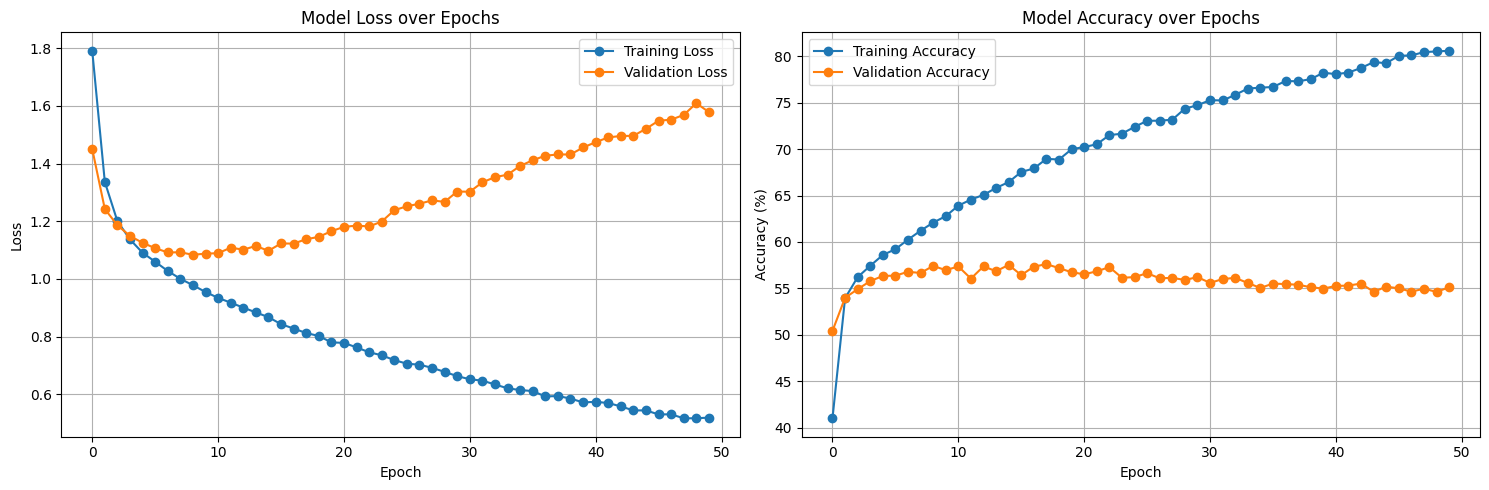

In [53]:
print("Iniciando entrenamiento...")
model, history = train_model(
    model=model,
    train_loader=train_loader,
    val_loader=val_loader,
    criterion=criterion,
    optimizer=optimizer,
    num_epochs=50
)

### Evaluamos el modelo

In [54]:
model.eval()
test_correct = 0
test_total = 0

with torch.no_grad():
    for batch in test_loader:
        features = batch['features'].to(device)
        sequences = batch['sequence'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model(sequences, features)
        _, predicted = outputs.max(1)
        test_total += labels.size(0)
        test_correct += predicted.eq(labels).sum().item()

test_acc = 100.*test_correct/test_total
print(f'\nTest Accuracy: {test_acc:.2f}%')


Test Accuracy: 56.22%


In [55]:
torch.save(model.state_dict(), 'models/first-model.pth')

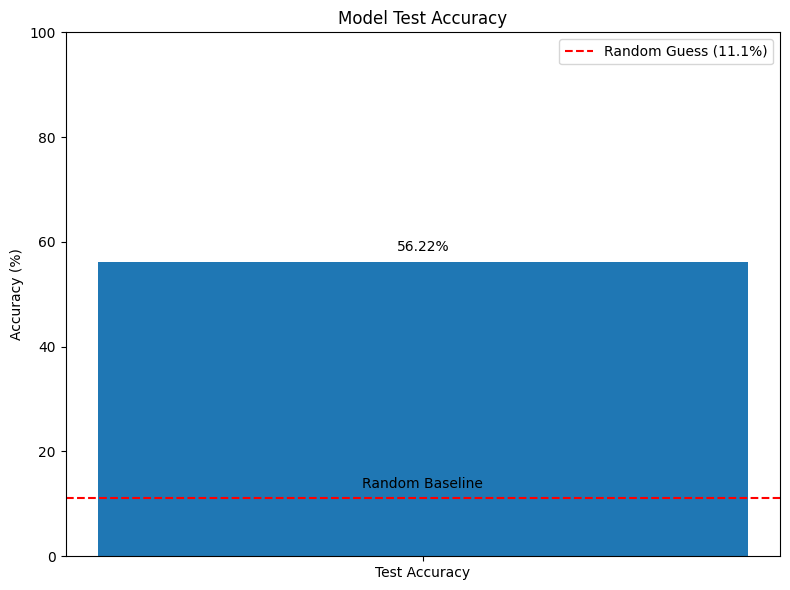

In [56]:
plt.figure(figsize=(8, 6))
plt.bar(['Test Accuracy'], [test_acc])
plt.axhline(y=100/9, color='r', linestyle='--', label='Random Guess (11.1%)')

plt.title('Model Test Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# A√±adir etiquetas
plt.text(0, test_acc + 2, f'{test_acc:.2f}%', ha='center')
plt.text(0, 100/9 + 2, 'Random Baseline', ha='center')

plt.legend()
plt.tight_layout()
plt.show()

# Interpretaci√≥n modelo 1

- Training accuracy llega a un 80% aproximadamente
- Validation accuracy se mantiene entre un 50% y un 60%
- Test accuracy llega a un 55%

Se presenta una clara se√±al de overfitting, el modelo no maneja bien los datos nuevos que recibe. Este se aprende muy bien los datos con los que entrena, sin embargo no es cap√°z de predecir correctamente los datos que no ha visto antes (validation y test). Sin embargo, desde el inicio la validation se mantiene por el 50%, no importa todo el entrenamiento no se mejora la validaci√≥n, esto puede presentar que el modelo es muy simple para el problema en cuesti√≥n. 

(Esto es malo)
- La arquitectura del modelo parece ser muy simple para el problema en cuesti√≥n
- A pesar de esto, solo aprende sobre el train dataset creando overfitting, nunca logra que la validation pase el 60%
- El batch size podr√≠a ser muy peque√±o
- El embedding podr√≠a ser de una dimensi√≥n muy peque√±a para captuar toda la informaci√≥n de los t√≠tulos

(Esto es bueno)
- Entre 9 clases, donde adivinar de manera aleatoria ser√≠a con un 11% de probabilidad, el modelo logra predecir correctamente el 50% de las veces.

# Modelo 2 (Mejorado, m√°s simple) ---------------------------------------

In [57]:
# Dividir en train/validation/test (70%/20%/10%)
X_temp, X_test, y_temp, y_test, seq_temp, seq_test = train_test_split(
    X, y, padded_sequences, test_size=0.2, random_state=42
)

X_train, X_val, y_train, y_val, seq_train, seq_val = train_test_split(
    X_temp, y_temp, seq_temp, test_size=0.25, random_state=42
)

print(f"Dimensiones de los datos:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}")
print(f"X_test: {X_test.shape}")

Dimensiones de los datos:
X_train: (30282, 14)
X_val: (10095, 14)
X_test: (10095, 14)


In [58]:
# Convertimos a tensores de PyTorch
X_train = torch.FloatTensor(X_train)
X_val = torch.FloatTensor(X_val)
X_test = torch.FloatTensor(X_test)

y_train = torch.LongTensor(y_train)
y_val = torch.LongTensor(y_val)
y_test = torch.LongTensor(y_test)

seq_train = torch.LongTensor(seq_train)
seq_val = torch.LongTensor(seq_val)
seq_test = torch.LongTensor(seq_test)

In [59]:
batch_size = 40
train_dataset = GameDataset(X_train, seq_train, y_train)
val_dataset = GameDataset(X_val, seq_val, y_val)
test_dataset = GameDataset(X_test, seq_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [60]:
class RobustScaler:
    def __init__(self):
        self.q1 = None
        self.q3 = None
        self.iqr = None
        self.median = None
    
    def fit(self, data):
        self.q1 = np.percentile(data, 25, axis=0)
        self.q3 = np.percentile(data, 75, axis=0)
        self.iqr = self.q3 - self.q1
        self.median = np.median(data, axis=0)
    
    def transform(self, data):
        return (data - self.median) / (self.iqr + 1e-8)

# Aplicar a las features num√©ricas
numeric_features = [
    'price_final', 'price_original', 'discount',
    'days_in_market', 'avg_hours', 'median_hours', 'std_hours',
    'recommendation_ratio', 'avg_helpful', 'avg_funny'
]

scaler = RobustScaler()
scaler.fit(final_df[numeric_features])
final_df[numeric_features] = scaler.transform(final_df[numeric_features])

### Implementamos residual block para que el gradiente pueda fluir por las capas sin que llegue a las √∫ltimas y haga cambios insignificantes

In [61]:
class ResidualBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Linear(dim, dim),
            nn.ReLU(),
            nn.BatchNorm1d(dim),
            nn.Dropout(0.2),
            nn.Linear(dim, dim)
        )
    
    def forward(self, x):
        return x + self.layers(x)

In [62]:
class SelfAttention(nn.Module):
    def __init__(self, embed_dim, num_heads=8):
        super().__init__()
        self.attention = nn.MultiheadAttention(embed_dim, num_heads, batch_first=True)
        self.norm = nn.LayerNorm(embed_dim)
        
    def forward(self, x):
        attn_output, _ = self.attention(x, x, x)
        return self.norm(x + attn_output)

### Disminu√≠mos el n√∫mero de capas para permitir que el modelo no aprenda en exceso el train-dataset

In [63]:
class SimplerGameRatingModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, max_length, num_features, num_classes):
        super().__init__()
        
        # Reducir dimensi√≥n del embedding a la mitad
        self.embedding_dim = embedding_dim // 2
        self.embedding = nn.Embedding(vocab_size, self.embedding_dim)
        
        # Procesamiento de t√≠tulos simplificado
        self.title_dim = max_length * self.embedding_dim
        self.title_processing = nn.Sequential(
            nn.Linear(self.title_dim, 64),  # Reducido de 256 a 64
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.3)
        )
        
        # Procesamiento num√©rico simplificado
        self.numeric_processing = nn.Sequential(
            nn.Linear(num_features, 32),  # Reducido de 128 a 32
            nn.ReLU(),
            nn.BatchNorm1d(32)
        )
        
        # Capas combinadas simplificadas
        self.combined_layers = nn.Sequential(
            nn.Linear(64 + 32, 64),  # Una sola capa oculta
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.5),  # Aumentado dropout
            nn.Linear(64, num_classes)
        )
        
    def forward(self, sequences, features):
        # Procesar t√≠tulos
        embedded = self.embedding(sequences)
        flat_embedded = embedded.reshape(embedded.size(0), -1)
        title_features = self.title_processing(flat_embedded)
        
        # Procesar features num√©ricas
        numeric_features = self.numeric_processing(features)
        
        # Combinar y procesar
        combined = torch.cat((title_features, numeric_features), dim=1)
        return self.combined_layers(combined)

### Agregamos early stopping para que el modelo se detenga durante el entrenamiento si detecta un retroceso considerable durante cierto n√∫mero de √©pocas (10)

In [64]:
class EarlyStopping:
    def __init__(self, patience=10, min_delta=0, mode='min'):
        self.patience = patience
        self.min_delta = min_delta
        self.mode = mode
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.best_model = None
    
    def __call__(self, current_value, model):
        if self.best_loss is None:
            self.best_loss = current_value
            self.best_model = model.state_dict().copy()
            return
        
        if self.mode == 'min':
            if current_value < self.best_loss - self.min_delta:
                self.best_loss = current_value
                self.counter = 0
                self.best_model = model.state_dict().copy()
            else:
                self.counter += 1
        else:  # mode == 'max'
            if current_value > self.best_loss + self.min_delta:
                self.best_loss = current_value
                self.counter = 0
                self.best_model = model.state_dict().copy()
            else:
                self.counter += 1
                
        if self.counter >= self.patience:
            self.early_stop = True

### Cambiamos de Adam a AdamW, lo que nos deber√≠a dar una mejor regularizaci√≥n
### Disminu√≠mos el learning rate y aumentamos el n√∫mero de √©pocas para tener un entrenamiento m√°s detallado

In [65]:

def train_simpler_model(model, train_loader, val_loader, num_epochs=400):
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=0.0001,
        weight_decay=0.01,
        betas=(0.9, 0.999)
    )
    
    # Listas para guardar el historial
    history = {
        'train_loss': [],
        'train_acc': [],
        'val_loss': [],
        'val_acc': []
    }
    
    # Calcular pesos de clase
    class_counts = torch.bincount(y_train)
    class_weights = 1.0 / class_counts.float()
    class_weights = class_weights.to(device)
    
    criterion = nn.CrossEntropyLoss(weight=class_weights)
    
    early_stopping = EarlyStopping(patience=10, mode='max')
    
    for epoch in range(num_epochs):
        # Training
        model.train()
        train_loss = 0
        train_correct = 0
        train_total = 0
        
        if epoch <= 5 or epoch >= num_epochs-5:
            iterator = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training')
        else:
            iterator = train_loader
        
        for batch in iterator:
            features = batch['features'].to(device)
            sequences = batch['sequence'].to(device)
            labels = batch['label'].to(device)
            
            optimizer.zero_grad()
            outputs = model(sequences, features)
            loss = criterion(outputs, labels)
            
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            train_loss += loss.item()
            _, predicted = outputs.max(1)
            train_total += labels.size(0)
            train_correct += predicted.eq(labels).sum().item()
        
        # Validation
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        
        with torch.no_grad():
            for batch in val_loader:
                features = batch['features'].to(device)
                sequences = batch['sequence'].to(device)
                labels = batch['label'].to(device)
                
                outputs = model(sequences, features)
                loss = criterion(outputs, labels)
                
                val_loss += loss.item()
                _, predicted = outputs.max(1)
                val_total += labels.size(0)
                val_correct += predicted.eq(labels).sum().item()
        
        # M√©tricas
        train_acc = 100.*train_correct/train_total
        val_acc = 100.*val_correct/val_total
        
        # Guardar historial
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        
        print(f'Epoch {epoch+1}/{num_epochs}:')
        print(f'Train Loss: {train_loss/len(train_loader):.4f} | Train Acc: {train_acc:.2f}%')
        print(f'Val Loss: {val_loss/len(val_loader):.4f} | Val Acc: {val_acc:.2f}%')
        
        # Early stopping
        early_stopping(val_acc, model)
        if early_stopping.early_stop:
            print("Early stopping triggered")
            model.load_state_dict(early_stopping.best_model)
            break
    
    # Visualizar el historial
    plt.figure(figsize=(15, 5))
    
    # Subplot para Loss
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Training Loss', marker='o')
    plt.plot(history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    
    # Subplot para Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Training Accuracy', marker='o')
    plt.plot(history['val_acc'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return model, history

Epoch 1/400 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 758/758 [00:01<00:00, 505.45it/s]


Epoch 1/400:
Train Loss: 2.1973 | Train Acc: 16.68%
Val Loss: 1.9186 | Val Acc: 25.79%


Epoch 2/400 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 758/758 [00:01<00:00, 634.49it/s]


Epoch 2/400:
Train Loss: 1.8919 | Train Acc: 25.00%
Val Loss: 1.7730 | Val Acc: 33.15%


Epoch 3/400 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 758/758 [00:01<00:00, 655.29it/s]


Epoch 3/400:
Train Loss: 1.7551 | Train Acc: 31.24%
Val Loss: 1.6593 | Val Acc: 38.59%


Epoch 4/400 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 758/758 [00:01<00:00, 608.20it/s]


Epoch 4/400:
Train Loss: 1.6565 | Train Acc: 35.77%
Val Loss: 1.6075 | Val Acc: 41.81%


Epoch 5/400 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 758/758 [00:01<00:00, 655.22it/s]


Epoch 5/400:
Train Loss: 1.5669 | Train Acc: 38.40%
Val Loss: 1.5396 | Val Acc: 44.94%


Epoch 6/400 - Training: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 758/758 [00:01<00:00, 633.71it/s]


Epoch 6/400:
Train Loss: 1.5277 | Train Acc: 40.98%
Val Loss: 1.5040 | Val Acc: 46.42%
Epoch 7/400:
Train Loss: 1.4746 | Train Acc: 42.77%
Val Loss: 1.4557 | Val Acc: 44.37%
Epoch 8/400:
Train Loss: 1.4641 | Train Acc: 43.70%
Val Loss: 1.4441 | Val Acc: 49.12%
Epoch 9/400:
Train Loss: 1.4063 | Train Acc: 45.83%
Val Loss: 1.4269 | Val Acc: 49.70%
Epoch 10/400:
Train Loss: 1.3871 | Train Acc: 45.89%
Val Loss: 1.4488 | Val Acc: 48.69%
Epoch 11/400:
Train Loss: 1.3604 | Train Acc: 46.12%
Val Loss: 1.4345 | Val Acc: 51.01%
Epoch 12/400:
Train Loss: 1.3427 | Train Acc: 47.28%
Val Loss: 1.4483 | Val Acc: 48.04%
Epoch 13/400:
Train Loss: 1.3302 | Train Acc: 48.05%
Val Loss: 1.5166 | Val Acc: 50.49%
Epoch 14/400:
Train Loss: 1.2986 | Train Acc: 48.66%
Val Loss: 1.4076 | Val Acc: 49.46%
Epoch 15/400:
Train Loss: 1.2897 | Train Acc: 49.12%
Val Loss: 1.5496 | Val Acc: 50.51%
Epoch 16/400:
Train Loss: 1.2553 | Train Acc: 49.77%
Val Loss: 1.4393 | Val Acc: 51.50%
Epoch 17/400:
Train Loss: 1.2460 | T

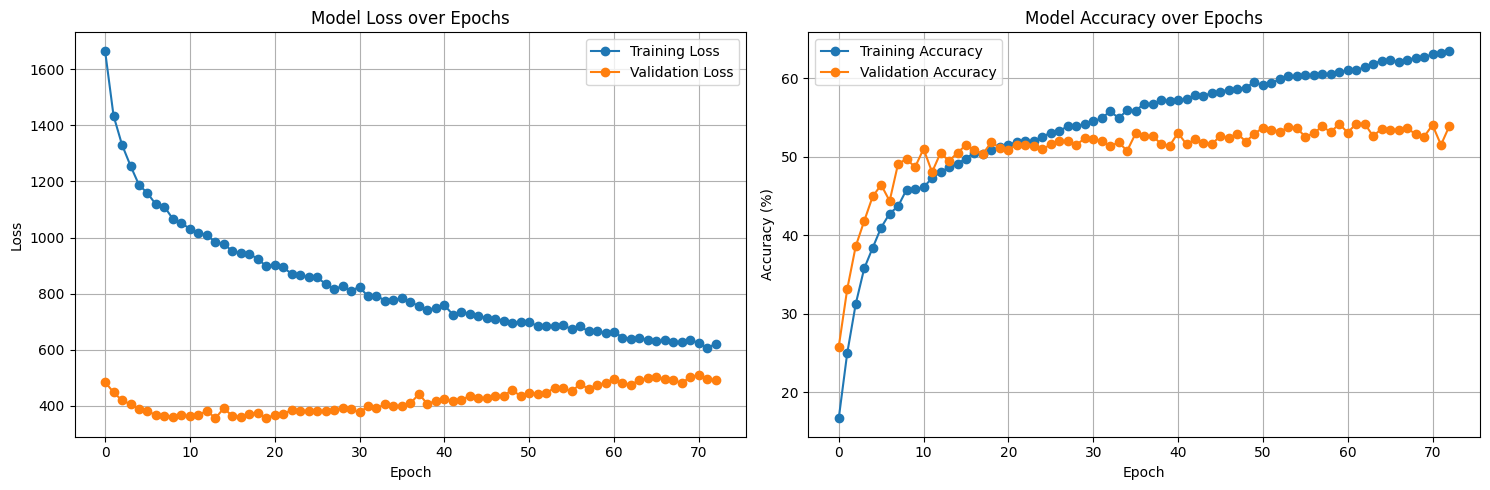

In [66]:
# Configuraci√≥n
config = {
    'vocab_size': vocab_size,
    'embedding_dim': 256,
    'max_length': 10,
    'num_features': X_train.shape[1],
    'num_classes': len(label_encoder.classes_)
}

# Crear y entrenar modelo
model2 = SimplerGameRatingModel(**config).to(device)
model2, history2 = train_simpler_model(model2, train_loader, val_loader)

In [67]:
model2.eval()
test_correct_2 = 0
test_total_2 = 0

with torch.no_grad():
    for batch in test_loader:
        features = batch['features'].to(device)
        sequences = batch['sequence'].to(device)
        labels = batch['label'].to(device)
        
        outputs = model2(sequences, features)
        _, predicted = outputs.max(1)
        test_total_2 += labels.size(0)
        test_correct_2 += predicted.eq(labels).sum().item()

test_acc_2 = 100.*test_correct_2/test_total_2
print(f'\nTest Accuracy: {test_acc_2:.2f}%')


Test Accuracy: 54.90%


In [68]:
torch.save(model2.state_dict(), 'models/second-model.pth')

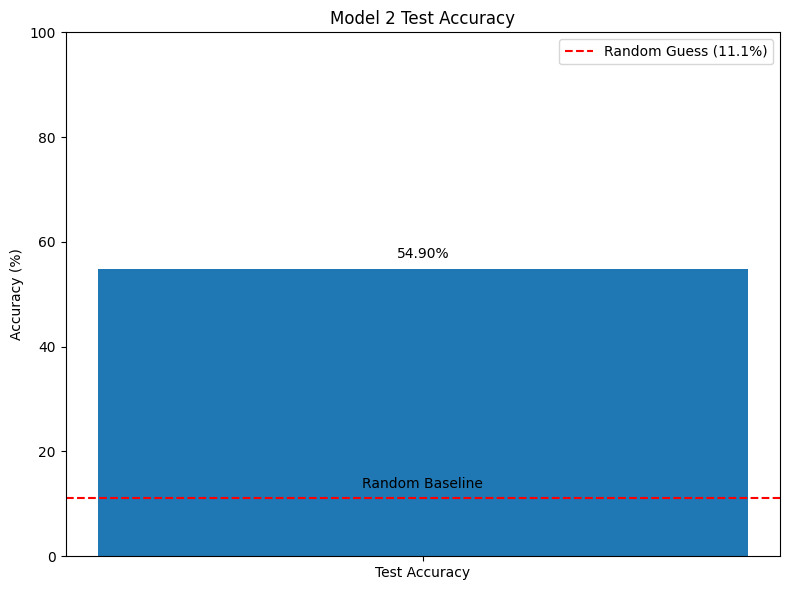

In [69]:
plt.figure(figsize=(8, 6))
plt.bar(['Test Accuracy'], [test_acc_2])
plt.axhline(y=100/9, color='r', linestyle='--', label='Random Guess (11.1%)')

plt.title('Model 2 Test Accuracy')
plt.ylabel('Accuracy (%)')
plt.ylim(0, 100)

# A√±adir etiquetas
plt.text(0, test_acc_2 + 2, f'{test_acc_2:.2f}%', ha='center')
plt.text(0, 100/9 + 2, 'Random Baseline', ha='center')

plt.legend()
plt.tight_layout()
plt.show()

# Interpretaci√≥n modelo 2
## Okay, hay un cambio notorio

- Training accuracy llega a un 60% aproximadamente
- Validation accuracy se mantiene cerca del 55%
- Test accuracy cerca del 55%

En este caso se nota un ligero overfitting pero con mejores resultados que el modelo anterior. Esta vez ambos test y validation se mantienen pegados duarante todo el entrenamiento, y gracias al parado autom√°tico cuando empiezan a separarse el modelo se detiene por no ver progreso en cierto n√∫mero de √©pocas.

(Esto es malo)
- Parece ser que al modelo de todas formas le cuesta progresar en la validation y en el test m√°s all√° del 55%

(Esto es bueno, sigue exactamente igual)
- Entre 9 clases, donde adivinar de manera aleatoria ser√≠a con un 11% de probabilidad, el modelo logra predecir correctamente el 55% de las veces.